# Getting data from COCA corpus

In [1]:
import pandas as pd
import zipfile
import re
import os
import matplotlib
import matplotlib.pyplot as plt 

In [2]:
# set filepath
COCA = "/Users/rachelker/Documents/UChic MSCAPP/Curriculum/2019-20 Winter/Computational Content Analysis/Project/Data/Davies Corpora/COCA/"
COCA

'/Users/rachelker/Documents/UChic MSCAPP/Curriculum/2019-20 Winter/Computational Content Analysis/Project/Data/Davies Corpora/COCA/'

## Getting texts

In [67]:
def get_data(corpus, topic_filter):    
    # get all text
    data = load_corpus(corpus)    
    all_news = []
    [all_news.extend(data[k]) for k in data.keys()]
        
    # load into dataframe
    df = pd.DataFrame(all_news, columns=['text'])
    df['text'] = df.apply(lambda x: x['text'].decode('utf-8', errors='ignore'), axis=1) 
    df = df[df['text']!='\r\n']
    df = df[df['text'].str.contains(topic_filter)]

    # get text_ids
    df['text_id'] = df.apply(lambda x: get_textid(x), axis=1)
    df.set_index('text_id', inplace=True)
    return df

def get_textid(row):
        text = row['text']
        text_id = re.search('(?<=##|@@)[0-9]+', text)
        return str(text_id.group(0))
    
def load_corpus(corpus):
    data = {}
    for zip_ in os.listdir(corpus):
        if "zip" in zip_ and "sources" not in zip_:
            try:
                zfile = zipfile.ZipFile(corpus + zip_)
                for file in zfile.namelist():
                    data[file] = []
                    with zfile.open(file) as f:
                        for line in f:
                            data[file].append(line)
            except:
                print(zip_, " ")
                continue

    return data

In [68]:
df = get_data(COCA, '')
# total of 219,379 articles

In [69]:
immigra_df = get_data(COCA, 'immigra')

In [70]:
immigra_df
# 11,747

,text
text_id,
2018849,"##2018849 <p> "" Bums . "" That 's what Radio Ha..."
2018857,##2018857 Section : SPENDING MONEY ranks the 1...
2018863,##2018863 Section : WORK IN THE ' 90S The hott...
2018864,##2018864 <p> Communism 's collapse could make...
2018979,##2018979 Section : NEWS FROM MOTHER <p> THIS ...
...,...
4163015,"@@4163015 When-his wife left him , Al Klugg tu..."
4163050,@@4163050 The only sport I ever saw my father ...
4163051,@@4163051 The zombie community is astir with c...


## Getting metadata

In [90]:
def get_sources():
    cols = ['text_id', 'word_count', 'year', 'genre', 'subgen', 'source', 'title', 'publication_info']

    zfile = zipfile.ZipFile(COCA + "sources.zip")
    source = []
    for file in zfile.namelist():
        with zfile.open(file) as f:
            i=0
            for line in f:
                if i<=1:
                    # skip first 2 lines
                    print(line)
                    i+=1
                    continue
               
                line = line.decode('utf-8', errors='ignore').split("\t", 7)
                if len(line)>4:
                    source.append(line)
    
    sources_df = pd.DataFrame(source, columns=cols)
    sources_df.set_index('text_id', inplace=True)
    return sources_df

In [91]:
sources_df = get_sources()

b'textID\t#words\tyear\tgenre\tsubgen\tsource\ttitle\t\t(publication info, for non-spoken)\r\n'
b'----\t----\t----\t----\t----\t----\t----\r\n'


In [92]:
sources_df
#248,948 sources

,word_count,year,genre,subgen,source,title,publication_info
text_id,,,,,,,
221118,8101,1990,SPOK,101,ABC_20/20,Is He a Killer?; Who Will Love My Pet?; The Tw...,None
221119,8358,1990,SPOK,101,ABC_20/20,Golden Years Behind Bars; The Joker; Goodbye W...,None
221120,7824,1990,SPOK,101,ABC_20/20,Too Old Too Soon; Danger on the Half Shell; Mi...,None
221121,8559,1990,SPOK,101,ABC_20/20,Chicken at Any Price?; The Daytop Solution; Su...,None
221122,8199,1990,SPOK,101,ABC_20/20,Children of Terror; Against All Odds; Buck Fev...,None
...,...,...,...,...,...,...,...
4174366,993,2017,ACAD,NULL,Inside Higher Ed,Study details tool to help professors measure ...,None
4174367,2393,2017,ACAD,NULL,Diverse: Issues in Higher Education,Experts: Colleges' Media Messages Need Diverse...,None
4174368,1034,2017,ACAD,NULL,Inside Higher Ed,Another Year on the Academic Job Market\r\n,None


## Merge text and meta data

In [93]:
# only take articles that have both text and metadata
immigra_merged_df = immigra_df.join(sources_df, how='inner')
all_merged_df = df.join(sources_df, how='inner')

In [96]:
print(len(immigra_merged_df), len(all_merged_df))

11743 219337


In [97]:
immigra_merged_df.groupby('year').size()
# about 100 a year

year
1990    374
1991    379
1992    359
1993    368
1994    441
1995    389
1996    476
1997    386
1998    342
1999    373
2000    467
2001    386
2002    430
2003    435
2004    463
2005    445
2006    648
2007    542
2008    461
2009    456
2010    531
2011    494
2012    527
2013    506
2014    538
2015    527
dtype: int64

In [98]:
immigra_merged_df.groupby('year').size()/all_merged_df.groupby('year').size()*100

year
1990    5.771605
1991    5.731136
1992    5.084986
1993    5.078664
1994    6.041924
1995    5.278871
1996    6.563707
1997    4.890409
1998    4.269130
1999    4.549890
2000    5.000535
2001    4.503033
2002    4.637619
2003    4.449218
2004    4.972079
2005    4.951046
2006    7.059593
2007    5.990274
2008    5.346167
2009    5.146146
2010    5.887571
2011    4.878049
2012    5.410122
2013    5.991002
2014    6.101849
2015    5.992041
dtype: float64

## Data cleaning

Chose to use 'immigra' as the query word as it is more relevant to the research questions of identifying trends in immigration policies

In [99]:
data = immigra_merged_df.reset_index()

In [100]:
def clean_title(row):
    title = row['title']
    remove = ['\r','\n','^']
    for string in remove:
        title = title.replace(string,'')
    return title

def clean_text(row):
    text = row['text']
    text_id = row['text_id']
    remove = ['\r','\n','<p>','@','##{}'.format(text_id)]
    for string in remove:
        text = text.replace(string,'')
    return text

In [101]:
data['title'] = data.apply(lambda x: clean_title(x), axis=1)
data['text'] = data.apply(lambda x: clean_text(x), axis=1)

In [103]:
data.to_csv('data/immigra_coca_all.csv', index=False)

## Summary of Sample

In [6]:
genres = data['genre'].unique()
genres

array(['MAG', 'ACAD', 'SPOK', 'FIC', 'NEWS'], dtype=object)

In [13]:
years = sorted(data['year'].unique())

### Number / percentage of docs

Text(0.5, 1.0, "Number of documents with 'immigra' in the COCA corpus by year")

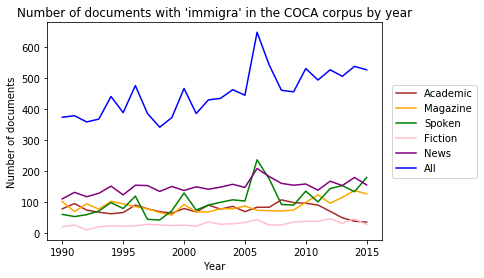

In [14]:
# Number of articles over time by genre
acad, = plt.plot(years, data[data['genre']=='ACAD'].groupby('year').size(), label='Academic')
mag, = plt.plot(years, data[data['genre']=='MAG'].groupby('year').size(), label='Magazine')
spok, = plt.plot(years, data[data['genre']=='SPOK'].groupby('year').size(), label='Spoken')
fic, = plt.plot(years, data[data['genre']=='FIC'].groupby('year').size(), label='Fiction')
news, = plt.plot(years, data[data['genre']=='NEWS'].groupby(['year']).size(), label='News')
all_, = plt.plot(years,data.groupby('year').size(), label="All")

colors = ["brown","orange","green","pink","purple","blue"]
for i in range(len(plt.gca().get_lines())):
    plt.gca().get_lines()[i].set_color(colors[i])
    
plt.legend(handles=[acad, mag, spok, fic, news, all_], loc="center right", bbox_to_anchor=(1.3, .5), ncol=1)


plt.ylabel('Number of documents')
plt.xlabel('Year')
plt.title("Number of documents with 'immigra' in the COCA corpus by year")

Text(0.5, 1.0, "Percentage of documents with 'immigra' in the COCA corpus by year")

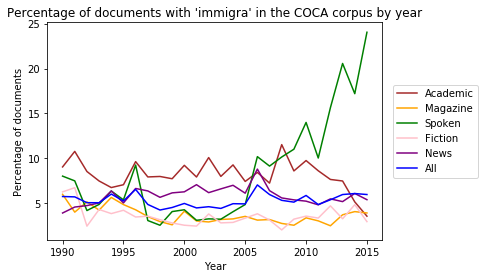

In [286]:
# Percentage of articles over time by genre

acad, = plt.plot(years, data[data['genre']=='ACAD'].groupby('year').size()/all_merged_df[all_merged_df['genre']=='ACAD'].groupby('year').size()*100, label='Academic')
mag, = plt.plot(years, data[data['genre']=='MAG'].groupby('year').size()/all_merged_df[all_merged_df['genre']=='MAG'].groupby('year').size()*100, label='Magazine')
spok, = plt.plot(years, data[data['genre']=='SPOK'].groupby('year').size()/all_merged_df[all_merged_df['genre']=='SPOK'].groupby('year').size()*100, label='Spoken')
fic, = plt.plot(years, data[data['genre']=='FIC'].groupby('year').size()/all_merged_df[all_merged_df['genre']=='FIC'].groupby('year').size()*100, label='Fiction')
news, = plt.plot(years, data[data['genre']=='NEWS'].groupby('year').size()/all_merged_df[all_merged_df['genre']=='NEWS'].groupby('year').size()*100, label='News')
all_, = plt.plot(years, data.groupby('year').size()/all_merged_df.groupby('year').size()*100, label="All")

colors = ["brown","orange","green","pink","purple","blue"]
for i in range(len(plt.gca().get_lines())):
    plt.gca().get_lines()[i].set_color(colors[i])
    
plt.legend(handles=[acad, mag, spok, fic, news, all_], loc="center right", bbox_to_anchor=(1.3, .5), ncol=1)

#plt.vlines('2006',0,700, linestyles='dashed')

plt.ylabel('Percentage of documents')
plt.xlabel('Year')
plt.title("Percentage of documents with 'immigra' in the COCA corpus by year")

### Average word count

In [257]:
# Average Word Count
data['word_count'] = data['word_count'].apply(int)
data['word_count'].sum() / len(data)

3870.7616452354596

In [258]:
print(data['word_count'].min(), data['word_count'].max())

56 107449


In [259]:
def get_word_count(data):
    word_count = []
    for yr in years:
        yr = str(yr)
        yearly = data[data['year']==yr]
        word_count.append(yearly['word_count'].sum() / len(yearly))
    return word_count

Text(0.5, 1.0, "Average word count of documents with 'immigra' in the COCA corpus by year")

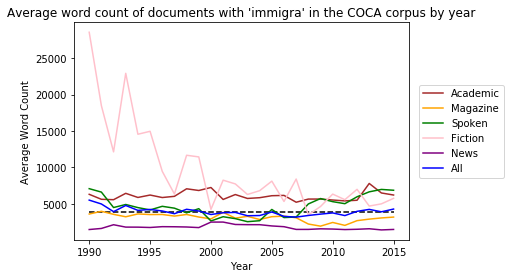

In [288]:
acad, = plt.plot(years, get_word_count(data[data['genre']=='ACAD']), label='Academic')
mag, = plt.plot(years, get_word_count(data[data['genre']=='MAG']), label='Magazine')
spok, = plt.plot(years, get_word_count(data[data['genre']=='SPOK']), label='Spoken')
fic, = plt.plot(years, get_word_count(data[data['genre']=='FIC']), label='Fiction')
news, = plt.plot(years, get_word_count(data[data['genre']=='NEWS']), label='News')
all_, = plt.plot(years, get_word_count(data), label='All')

colors = ["brown","orange","green","pink","purple","blue"]
for i in range(6):
    plt.gca().get_lines()[i].set_color(colors[i])
    
plt.legend(handles=[acad, mag, spok, fic, news, all_], loc="center right", bbox_to_anchor=(1.3, .5), ncol=1)

# plot average of sample
plt.hlines(data['word_count'].sum() / len(data), 1990, 2015, linestyles='dashed')

plt.ylabel('Average Word Count')
plt.xlabel('Year')
plt.title("Average word count of documents with 'immigra' in the COCA corpus by year")

### Unique sources

In [27]:
# Number of unique sources over time
def get_unique_source(data):
    unique_source = []
    for yr in years:
        yearly = data[data['year']==yr]
        unique_source.append(len(yearly['source'].unique()))
    return unique_source

In [28]:
len(data['source'].unique())

832

In [23]:
years[-1]

2015

Text(0.5, 1.0, "Number of unique sources with 'immigra' in the COCA corpus by year")

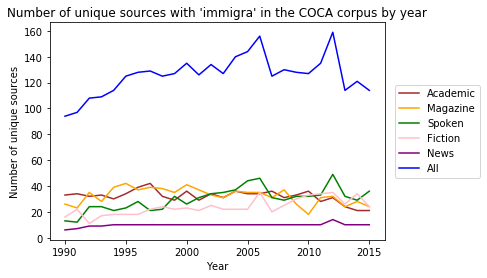

In [30]:
acad, = plt.plot(years, get_unique_source(data[data['genre']=='ACAD']), label='Academic')
mag, = plt.plot(years, get_unique_source(data[data['genre']=='MAG']), label='Magazine')
spok, = plt.plot(years, get_unique_source(data[data['genre']=='SPOK']), label='Spoken')
fic, = plt.plot(years, get_unique_source(data[data['genre']=='FIC']), label='Fiction')
news, = plt.plot(years, get_unique_source(data[data['genre']=='NEWS']), label='News')
all_, = plt.plot(years, get_unique_source(data), label='All')

colors = ["brown","orange","green","pink","purple","blue"]
for i in range(6):
    plt.gca().get_lines()[i].set_color(colors[i])
    
plt.legend(handles=[acad, mag, spok, fic, news, all_], loc="center right", bbox_to_anchor=(1.3, .5), ncol=1)

plt.ylabel('Number of unique sources')
plt.xlabel('Year')
plt.title("Number of unique sources with 'immigra' in the COCA corpus by year")